Rappel Python 
Exercices 

Des exercices

Répondez aux questions suivantes : 

Qu'est-ce que 7 à la puissance de 4?

In [1]:
7**4

2401

Splittez cette chaine de caractère : s = "Hi there Sam!"

In [3]:
s = "Hi there Sam!"
s.split()

['Hi', 'there', 'Sam!']

Affichez ce message : The diameter of Earth, is 12742 km

Sachant que : planet = Earth, diamètre = 12742  // Utilisez :  .format()

In [16]:
planet = "Earth"
diametre = 12742

In [17]:
print("The diameter of {}, is {} km".format(planet, diametre))

The diameter of Earth, is 12742 km


Indexes : trouver hello dans : 

lst = [1,2,[3,4], [5,[100,200,['hello']], 23,11],1,7] 

In [18]:
lst = [1,2,[3,4], [5,[100,200,['hello']], 23,11],1,7]

In [24]:
lst[3][1][2][0]

'hello'

Dic : trouver hello dans : d = {'k1' : [1,2,3,{'tricky':['oh', 'man','inception', {'target': [1,2,3,'hello']}]}]}

In [27]:
d = {'k1' : [1,2,3,{'tricky':['oh', 'man','inception', {'target': [1,2,3,'hello']}]}]}

In [39]:
d['k1'][3]['tricky'][3]['target'][3]

'hello'

Quelle est la différence entre Tuple et liste ?

Créez une fonction qui grab l'email du web site domaine du string : 

Exemple : user@domain.com = domain.com

In [42]:
def getDomain(email):
    return email.split('@')[1]

In [43]:
getDomain('user@domain.com')

'domain.com'


Créez une fonction qui détecte si le mot dog est présent (que dans les minuscules)


In [68]:
def isDogHere(string):
    return string.find('dog')!=-1

In [71]:
isDogHere('mon dog est magnifique')

True

Créez une fonction qui compte le nombre d'occurrence du mot 'dog'

In [66]:
def howManyDogs(string):
    return string.count('dog')

In [67]:
howManyDogs('This dog runs faster than the other dog dude!')

2

Final : 
Écrivez une fonction qui retourne 3 sanctions au dépit de la vitesse de la conduite : 
1. No Ticket : <60 / Small ticket 61<>80 / Big Ticket : > 81 
2. Si c'est son anniversaire : remise de 5

In [60]:
def caught_speeding(vitesse,anniv):
    if vitesse<60:
        return "No ticket"
    elif vitesse>81:
        if anniv:
            return "Big ticket avec remise"
        else:
            return "Big ticket"
    else:
        if anniv:
            return "Small ticket avec remise"
        else:
            return "Small ticket"

In [63]:
caught_speeding(82,True)

'Big ticket avec remise'

In [62]:
caught_speeding(81,False)

'Small ticket'

# Exercice 2

In [ ]:
le = LabelEncoder()
print(df_l['state'].value_counts())
le.fit(df_l['state'])
print(le.classes_)
le.transform(df_l['state'])

In [1479]:
import pandas as pd
import numpy as np
import matplotlib

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

In [1523]:
acc,prec,rec,f1 = [0,0,0,0]
loops=10

for _ in range(loops):
    original_dataset = pd.read_csv('customer_churn.csv',index_col=0)

    original_dataset = pd.concat([original_dataset,
                                    pd.get_dummies(original_dataset['international_plan'],
                                                   prefix='international_plan',
                                                   drop_first=True)],axis=1)
    original_dataset = pd.concat([original_dataset,
                                    pd.get_dummies(original_dataset['voice_mail_plan'],
                                                   prefix='voice_mail_plan',
                                                   drop_first=True)],axis=1)
    original_dataset = pd.concat([original_dataset,
                                    pd.get_dummies(original_dataset['area_code'],
                                                   prefix='area_code',
                                                   drop_first=True)],axis=1)

    original_dataset_churn_yes = original_dataset.loc[original_dataset['churn'] == 'yes']
    original_dataset_churn_no = original_dataset.loc[original_dataset['churn'] == 'no']
    randomized_dataset_churn_yes = original_dataset_churn_yes.sample(frac=1)
    randomized_dataset_churn_no = original_dataset_churn_no.sample(frac=1)

    training_percentage = 80

    randomized_dataset_churn_yes_length = len(randomized_dataset_churn_yes.index)
    randomized_dataset_churn_no_length = len(randomized_dataset_churn_no.index)

    training_dataset_churn_yes_length = randomized_dataset_churn_yes_length*training_percentage//100
    training_dataset_churn_no_length = randomized_dataset_churn_no_length*training_percentage//100

    training_dataset = pd.concat([randomized_dataset_churn_yes.iloc[0:training_dataset_churn_yes_length],
                                 randomized_dataset_churn_no.iloc[0:training_dataset_churn_no_length]])

    test_dataset = pd.concat([randomized_dataset_churn_yes.iloc[training_dataset_churn_yes_length:],
                                 randomized_dataset_churn_no.iloc[training_dataset_churn_no_length:]])

    X_train = training_dataset.drop(['state',
                                     'area_code',
                                     'international_plan',
                                     'voice_mail_plan',
                                     'number_vmail_messages',
                                     'account_length',
                                     'churn'],axis=1)
    y_train = training_dataset['churn']

    X_test = test_dataset.drop(['state',
                                'area_code',
                                'international_plan',
                                'voice_mail_plan',
                                'number_vmail_messages',
                                'account_length',
                                'churn'],axis=1)
    y_test = test_dataset['churn']

    RFC = RandomForestClassifier(random_state=0, n_estimators=150)
    RFC.fit(X_train, y_train)
    y_pred=RFC.predict(X_test)
    y_true=np.array(list(y_test))
    acc += accuracy_score(y_test, y_pred)
    prec += precision_score(y_true, y_pred, pos_label='yes')
    rec += recall_score(y_true, y_pred, pos_label='yes')
    f1 += f1_score(y_true, y_pred, pos_label='yes')

acc_res,prec_res,rec_res,f1_res = [acc/loops,prec/loops,rec/loops,f1/loops]

print("accuracy : ", acc_res)
print("precision : ", prec_res)
print("recall : ", rec_res)
print("f1_score : ", f1_res)

accuracy :  0.9547226386806595
precision :  0.9376768463141014
recall :  0.7381443298969073
f1_score :  0.8253628949775393


In [1429]:
print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

no     85.52138
yes    14.47862
Name: churn, dtype: float64
no     85.457271
yes    14.542729
Name: churn, dtype: float64


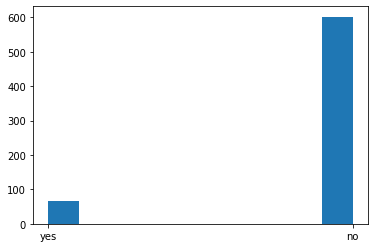

In [1399]:
from pylab import *
hist(y_pred)

In [1524]:
param_imp = pd.DataFrame([(X_test.columns[i], RFC.feature_importances_[i]*100) for i in range(len(RFC.feature_importances_))],columns=['col_name','importance'])
param_imp.sort_values(by='importance',ascending=False).head(10)

,col_name,importance
0,total_day_minutes,13.971518
2,total_day_charge,13.544402
12,number_customer_service_calls,12.311349
13,international_plan_yes,8.922616
5,total_eve_charge,6.818523
3,total_eve_minutes,6.765505
10,total_intl_calls,5.895616
11,total_intl_charge,4.454244
6,total_night_minutes,4.339952
9,total_intl_minutes,4.239941


In [1353]:
params = list(param_imp[param_imp['importance']<0.038]['col_name'])
params

['account_length',
 'total_day_calls',
 'total_eve_calls',
 'total_night_minutes',
 'voice_mail_plan_yes']

In [1515]:
X_train

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes,area_code_area_code_415,area_code_area_code_510
373,218.0,57,37.06,114.4,88,9.72,269.2,95,12.11,12.4,1,3.35,0,1,0,1,0
99,212.1,131,36.06,209.4,104,17.80,167.2,96,7.52,5.3,5,1.43,1,0,0,0,0
934,125.8,103,21.39,207.7,96,17.65,207.4,143,9.33,14.1,4,3.81,1,1,0,0,1
3192,240.0,83,40.80,134.1,106,11.40,189.1,84,8.51,9.3,2,2.51,0,0,0,1,0
816,314.6,102,53.48,169.8,86,14.43,285.1,100,12.83,5.7,3,1.54,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,184.2,111,31.31,312.6,89,26.57,264.0,55,11.88,12.2,4,3.29,1,0,1,1,0
1973,150.3,101,25.55,255.9,112,21.75,136.7,62,6.15,12.5,4,3.38,2,0,0,1,0
108,117.9,131,20.04,164.5,115,13.98,217.0,86,9.76,9.8,3,2.65,1,0,1,0,1
739,159.5,123,27.12,240.8,93,20.47,210.3,76,9.46,11.4,3,3.08,1,0,0,0,1


In [1522]:
selector = SelectKBest(chi2, k=5)
selector.fit_transform(X_train, y_train)
cols = selector.get_support(indices=True)
X_train_new = X_train.iloc[:,cols]
X_train_new

,total_day_minutes,total_day_charge,total_eve_minutes,number_customer_service_calls,international_plan_yes
373,218.0,37.06,114.4,0,1
99,212.1,36.06,209.4,1,0
934,125.8,21.39,207.7,1,1
3192,240.0,40.80,134.1,0,0
816,314.6,53.48,169.8,2,0
...,...,...,...,...,...
2640,184.2,31.31,312.6,1,0
1973,150.3,25.55,255.9,2,0
108,117.9,20.04,164.5,1,0
739,159.5,27.12,240.8,1,0
